Подготовка к экзамену

          MIP      STDIP      EKIP       SIP        MC       STDC        EKC  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   

           SC  TG  
0   74.242225   0  
1  127.393580   0  
2   63.171909   0  
3   53.593661   0  
4  252.567306   0  
111.262
10.008
STDC max 110.642
STDC 0.181 

0.832


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.862


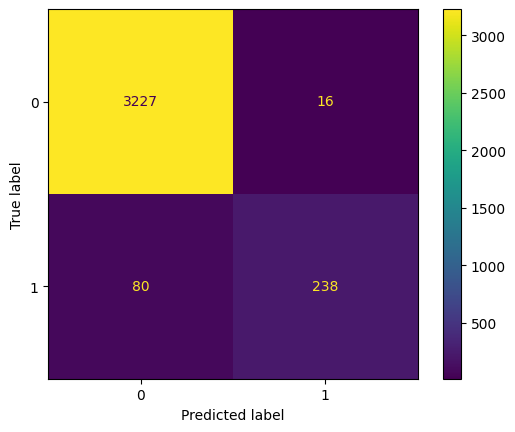

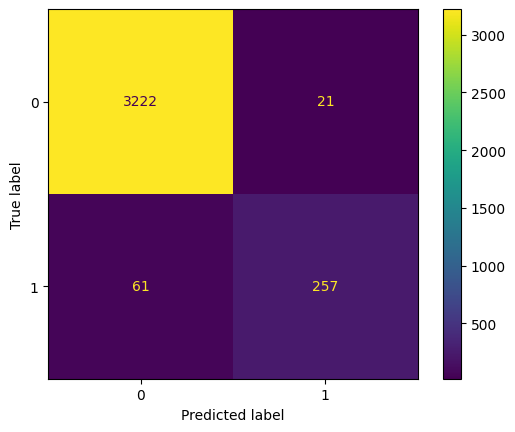

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('EKZAMEN.csv')
#data = data[(data['MIP']<=100) & (data['MIP']>=10)]
data = data[((data['TG'] == 0)&(data['MIP'] >= 56.953125) & (data['MIP']<= 172.5625))|((data['TG'] == 1)&(data['MIP'] >= 10.0078125) & (data['MIP']<= 127.5859375))]

print(data.head())
print(round(data['MIP'].mean(),3))
print(round(min(data['MIP']),3))
data.sort_values(by=['SIP'], ascending=True, inplace = True)
lbl = 'TG'
X = data.drop(lbl, axis = 1)
#print(X)
y = data[[lbl]]
#print(y)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 33, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 13, stratify = y)
print('STDC max',round(max(X_train['STDC']),3))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform = 'pandas')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(round(X_train['STDIP'].mean(),3))
print('STDC',round(X_train['STDC'].mean(),3),'\n')

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

from sklearn.metrics import f1_score
print(round(f1_score(y_test, y_pred), 3))



from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred2 = knc.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2, labels=knc.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf.classes_)
disp2.plot()
print(round(f1_score(y_test, y_pred2), 3))